<a href="https://colab.research.google.com/github/diego51alejo/Crime_Prediction/blob/master/ETL_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Limpieza y Visualización de la data de los Delitos en Bucaramanga**

En el presente notebook se limpian los datos abiertos de los delitos en Bucaramanga, posteriormente se realizan visualizaciones para entender mejor los datos.

Se importan las librerías necesarias para el proceso

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
token_map_plot='pk.eyJ1IjoiZGllZ281MWFsZWpvIiwiYSI6ImNrd3Rid2xtOTFmM2kybnM2bWczeWdobTUifQ.sZrX27F8jDgXL_eUYA6SVw'
px.set_mapbox_access_token(token_map_plot)

## Data Load

La [data](https://www.datos.gov.co/Seguridad-y-Defensa/Delitos-en-Bucaramanga-enero-2010-a-diciembre-de-2/75fz-q98y) son los registros de delitos en la ciudad de Bucaramanga, Colombia desde 2010 hasta 2021. 



In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/Colab Notebooks/db'

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/db


In [3]:
df_del = pd.read_csv('Delitos_en_Bucaramanga_act.csv')
df_del

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,1,ARMA BLANCA / CORTOPUNZANTE,BUENOS AIRES,7.170557,-73.135108,URBANA,14. Morrorico,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,30,05. Adultez,UNION LIBRE,MASCULINO,A PIE,A PIE
1,2,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.120645,-73.12605,URBANA,05. García Rovira,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,21,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
2,3,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.120645,-73.12605,URBANA,05. García Rovira,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,23,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
3,4,ARMA BLANCA / CORTOPUNZANTE,COMUNEROS,7.151359,-73.145705,URBANA,03. San Francisco,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,36,05. Adultez,CASADO,MASCULINO,A PIE,A PIE
4,5,ARMA BLANCA / CORTOPUNZANTE,GIRARDOT,7.170557,-73.135108,URBANA,04. Occidental,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,20,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135071,135072,SIN EMPLEO DE ARMAS,CABECERA DEL LLANO,NaN,NaN,NO REPORTA,12. Cabecera del Llano,2021,12. Diciembre,31,05. Viernes,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,25,04. Jovenes,NO REPORTA,NO REPORTA,A PIE,PASAJERO MOTOCICLETA
135072,135073,ARMA DE FUEGO,JARDINES DE COAVICONSA,NaN,NaN,NO REPORTA,11. Sur,2021,12. Diciembre,31,05. Viernes,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,21,04. Jovenes,NO REPORTA,NO REPORTA,A PIE,CONDUCTOR MOTOCICLETA
135073,135074,ARMA DE FUEGO,PROVENZA,NaN,NaN,NO REPORTA,10. Provenza,2021,12. Diciembre,31,05. Viernes,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,25,04. Jovenes,NO REPORTA,NO REPORTA,A PIE,CONDUCTOR MOTOCICLETA
135074,135075,ARMA BLANCA / CORTOPUNZANTE,TOLEDO PLATA,NaN,NaN,NO REPORTA,11. Sur,2021,12. Diciembre,31,05. Viernes,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,47,05. Adultez,NO REPORTA,NO REPORTA,A PIE,A PIE


## Preprocessing

Se seleccionan los datos deseados para el modelo y se realiza la limpieza.

In [4]:
df_copy = df_del.loc[:,[
  'CONDUCTA',
 'LATITUD',
 'LONGITUD',
 'NOM_COMUNA',
 'BARRIOS_HECHO',
 'ANO',
 'MES',
 'DIA',
 'DIA_SEMANA',
 'GENERO',
 'EDAD',
 'MOVIL_VICTIMA',
 'MOVIL_AGRESOR'
]]
df_copy

,CONDUCTA,LATITUD,LONGITUD,NOM_COMUNA,BARRIOS_HECHO,ANO,MES,DIA,DIA_SEMANA,GENERO,EDAD,MOVIL_VICTIMA,MOVIL_AGRESOR
0,LESIONES PERSONALES,7.170557,-73.135108,14. Morrorico,BUENOS AIRES,2010,01. Enero,1,05. Viernes,MASCULINO,30,A PIE,A PIE
1,LESIONES PERSONALES,7.120645,-73.12605,05. García Rovira,CAMPO HERMOSO,2010,01. Enero,1,05. Viernes,MASCULINO,21,A PIE,A PIE
2,LESIONES PERSONALES,7.120645,-73.12605,05. García Rovira,CAMPO HERMOSO,2010,01. Enero,1,05. Viernes,MASCULINO,23,A PIE,A PIE
3,LESIONES PERSONALES,7.151359,-73.145705,03. San Francisco,COMUNEROS,2010,01. Enero,1,05. Viernes,MASCULINO,36,A PIE,A PIE
4,LESIONES PERSONALES,7.170557,-73.135108,04. Occidental,GIRARDOT,2010,01. Enero,1,05. Viernes,MASCULINO,20,A PIE,A PIE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135071,HURTO A PERSONAS,NaN,NaN,12. Cabecera del Llano,CABECERA DEL LLANO,2021,12. Diciembre,31,05. Viernes,NO REPORTA,25,PASAJERO MOTOCICLETA,A PIE
135072,HURTO A PERSONAS,NaN,NaN,11. Sur,JARDINES DE COAVICONSA,2021,12. Diciembre,31,05. Viernes,NO REPORTA,21,CONDUCTOR MOTOCICLETA,A PIE
135073,HURTO A PERSONAS,NaN,NaN,10. Provenza,PROVENZA,2021,12. Diciembre,31,05. Viernes,NO REPORTA,25,CONDUCTOR MOTOCICLETA,A PIE
135074,HURTO A PERSONAS,NaN,NaN,11. Sur,TOLEDO PLATA,2021,12. Diciembre,31,05. Viernes,NO REPORTA,47,A PIE,A PIE


In [5]:
df_copy.shape

(135076, 13)

In [6]:
filter_comunas = df_copy.index[df_copy['NOM_COMUNA'].str.contains('sin informacion|Giron|Barrancabermeja|Medellin|Piedecuesta|Floridablanca')].tolist()
df_copy.drop(index=filter_comunas, inplace=True)

In [7]:
df_copy.shape

(134865, 13)

In [8]:
df_copy.loc[:,['NOM_COMUNA']] = df_copy['NOM_COMUNA'].str[4:]
df_copy['MES'] = df_copy['MES'].str[4:]
df_copy['DIA_SEMANA'] = df_copy['DIA_SEMANA'].str[4:]

In [9]:
df_copy['MES']=df_copy['MES'].str.upper()
df_copy['DIA_SEMANA']=df_copy['DIA_SEMANA'].str.upper()
df_copy['GENERO']=df_copy['GENERO'].str.upper()
df_copy['NOM_COMUNA']=df_copy['NOM_COMUNA'].str.upper()
df_copy['CONDUCTA']=df_copy['CONDUCTA'].str.upper()
df_copy['EDAD']=df_copy['EDAD'].str.upper()

In [10]:
df_copy['EDAD']=df_copy['EDAD'].replace('-', 'NO REPORTA')

In [11]:
df_copy['CONDUCTA'].unique()

array(['LESIONES PERSONALES', 'HURTO A PERSONAS', 'HOMICIDIO',
       'HURTO A RESIDENCIAS', 'HURTO A ENTIDADES COMERCIALES',
       'VIOLENCIA INTRAFAMILIAR',
       'LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )',
       'ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS',
       'HURTO A MOTOCICLETAS', 'ACTOS SEXUALES CON MENOR DE 14 AÑOS',
       'HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)',
       'ACCESO CARNAL VIOLENTO', 'EXTORSIÓN',
       'ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS AGRAVACIÓN)',
       'ACTO SEXUAL VIOLENTO', 'HURTO A AUTOMOTORES',
       'SECUESTRO EXTORSIVO', 'HURTO A ENTIDADES FINANCIERAS',
       'ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR',
       'ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR',
       'ACOSO SEXUAL', 'HURTO A PIRATERÍA TERRESTRE',
       'ACTO SEXUAL VIOLENTO (CIRCUNSTANCIAS DE AGRAVACIÓN)',
       'ACTOS SEXUALES CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS DE AGRAVACIÓN)',
       'HURTO 

In [12]:
df_seg = df_copy[(df_copy['ANO'] > 2013)]
df_seg.head(5)

,CONDUCTA,LATITUD,LONGITUD,NOM_COMUNA,BARRIOS_HECHO,ANO,MES,DIA,DIA_SEMANA,GENERO,EDAD,MOVIL_VICTIMA,MOVIL_AGRESOR
40731,LESIONES PERSONALES,7.142148,-73.13507,SAN FRANCISCO,NORTE BAJO,2014,ENERO,1,MIÉRCOLES,MASCULINO,30,A PIE,A PIE
40732,LESIONES PERSONALES,7.116489,-73.113197,CABECERA DEL LLANO,SOTOMAYOR,2014,ENERO,1,MIÉRCOLES,MASCULINO,22,A PIE,A PIE
40733,LESIONES PERSONALES,7.140531,-73.106798,EGIMIENTO 3,VDA. LA MALAÑA,2014,ENERO,1,MIÉRCOLES,MASCULINO,46,CONDUCTOR TAXI,PASAJERO TAXI
40734,LESIONES PERSONALES,7.141422,-73.135601,NORTE,VILLA MERCEDES,2014,ENERO,1,MIÉRCOLES,MASCULINO,21,A PIE,A PIE
40735,LESIONES PERSONALES,7.153392,-73.130486,NORTE,VILLA ROSA,2014,ENERO,1,MIÉRCOLES,MASCULINO,24,A PIE,A PIE


In [13]:
df_seg.describe(include='all')

,CONDUCTA,LATITUD,LONGITUD,NOM_COMUNA,BARRIOS_HECHO,ANO,MES,DIA,DIA_SEMANA,GENERO,EDAD,MOVIL_VICTIMA,MOVIL_AGRESOR
count,94177,89450.000000,89450.000000,94177,94177,94177.000000,94177,94177.000000,94177,94177,94177,94177,94177
unique,40,65477.000000,60688.000000,20,438,NaN,12,NaN,7,3,97,14,14
top,HURTO A PERSONAS,7.144371,-73.128085,SAN FRANCISCO,CENTRO,NaN,DICIEMBRE,NaN,SÁBADO,MASCULINO,NO REPORTA,A PIE,A PIE
freq,37295,399.000000,398.000000,11109,7847,NaN,8562,NaN,14829,42494,8029,73601,66394
mean,NaN,NaN,NaN,NaN,NaN,2017.510146,NaN,15.475243,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2.212318,NaN,8.802275,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,23.000000,NaN,NaN,NaN,NaN,NaN


Para tener una mejor visión de los delitos se realiza una tabla pivote, como index los años y como columnas los meses.

In [14]:
crim_anios= df_copy.groupby(['ANO','MES']).count()
crim_anios.pivot_table(values='CONDUCTA', index='ANO', columns='MES')

MES,ABRIL,AGOSTO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE
ANO,,,,,,,,,,,,
2010,659,812,695,762,569,703,700,635,693,713,874,861
2011,822,922,860,784,756,858,828,826,802,931,1005,947
2012,908,901,884,975,1016,892,897,977,1072,648,824,918
2013,975,964,763,876,845,985,858,926,834,755,945,1033
2014,750,1017,918,681,655,858,688,956,790,882,949,1070
2015,856,849,819,928,983,882,878,984,906,872,956,912
2016,1161,1128,1220,1119,1236,1063,1120,1103,1117,1077,1134,1122
2017,950,1092,1093,968,1038,967,948,967,1119,1025,1087,1044
2018,1152,1106,1091,1097,1145,1154,1034,1043,1147,1197,1290,1033


Se exportan los datos para realizar una simplificación de la conducta.

In [15]:
dir_pandas = '/content/drive/My Drive/Colab Notebooks/db/{}'.format('conducta.csv')
dir_pandas

'/content/drive/My Drive/Colab Notebooks/db/conducta.csv'

In [16]:
df_seg['CONDUCTA'].to_csv(dir_pandas, sep=',', index=False)

### Clasificación simplificada de conducta

Se genera una nueva columna donde se implifica la conducta: en HOMICIDIOS, HURTOS y LESIONES PERSONALES

In [17]:
df_homicidio = df_seg[df_seg['CONDUCTA'].str.contains('HOMICIDIO|FEMINICIDIO')]
df_hurto = df_seg[df_seg['CONDUCTA'].str.contains('HURTO')]
df_lesiones_personas = df_seg[df_seg['CONDUCTA'].str.contains('LESIONES PERSONALES')]

In [ ]:
df_lesiones_personas['CONDUCTA_SIMP'] = 'LESIONES PERSONALES'
df_homicidio['CONDUCTA_SIMP'] = 'HOMICIDIO'
df_hurto['CONDUCTA_SIMP'] = 'HURTO'

In [19]:
df_crime = pd.concat([df_hurto, df_homicidio, df_lesiones_personas], axis=0) 

In [20]:
df_crime = df_crime[(df_crime['CONDUCTA'] != 'LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )') & (df_crime['CONDUCTA'] != 'HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)') & (df_crime['CONDUCTA'] != 'LESIONES PERSONALES ( CIRCUNSTANCIAS DE AGRAVACIÓN)')]

In [21]:
df_crime['CONDUCTA'].unique()

array(['HURTO A PERSONAS', 'HURTO A ENTIDADES COMERCIALES',
       'HURTO A MOTOCICLETAS', 'HURTO A RESIDENCIAS',
       'HURTO A AUTOMOTORES', 'HURTO A ABIGEATO',
       'HURTO A ENTIDADES FINANCIERAS', 'HURTO A PIRATERÍA TERRESTRE',
       'HOMICIDIO', 'FEMINICIDIO', 'LESIONES PERSONALES'], dtype=object)

In [22]:
crim_anios= df_crime.groupby(['ANO','MES']).count()
crim_anios.pivot_table(values='CONDUCTA', index='ANO', columns='MES')

MES,ABRIL,AGOSTO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE
ANO,,,,,,,,,,,,
2014,443,508,472,413,362,474,360,558,449,492,526,562
2015,517,484,475,525,491,518,524,517,573,562,578,515
2016,695,682,746,665,746,685,691,650,675,659,699,655
2017,674,805,789,673,706,704,645,666,736,750,814,715
2018,844,840,836,779,800,857,794,766,831,904,964,804
2019,842,629,1761,803,720,820,784,660,830,797,836,793
2020,240,646,698,1020,811,603,576,531,431,1009,1004,652
2021,1104,870,411,914,1114,935,1030,1149,1015,479,565,764


In [23]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67688 entries, 40751 to 132886
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CONDUCTA       67688 non-null  object
 1   LATITUD        66233 non-null  object
 2   LONGITUD       66233 non-null  object
 3   NOM_COMUNA     67688 non-null  object
 4   BARRIOS_HECHO  67688 non-null  object
 5   ANO            67688 non-null  int64 
 6   MES            67688 non-null  object
 7   DIA            67688 non-null  int64 
 8   DIA_SEMANA     67688 non-null  object
 9   GENERO         67688 non-null  object
 10  EDAD           67688 non-null  object
 11  MOVIL_VICTIMA  67688 non-null  object
 12  MOVIL_AGRESOR  67688 non-null  object
 13  CONDUCTA_SIMP  67688 non-null  object
dtypes: int64(2), object(12)
memory usage: 7.7+ MB


#### Depuración Latitud y Longitud

La latitud y la longitud está en formato string pero existen valores nulos los cuales son importantes para el estudio, por lo cúal se hace necesario un proceso especial.

In [ ]:
df_crime_2020 =  df_crime[(df_crime['ANO'] == 2020) & (df_crime['MES'] == 'DICIEMBRE')]
df_crime_2020.rename(columns={'LATITUD': 'LONGITUD', 'LONGITUD': 'LATITUD'}, inplace=True)

In [25]:
df_crime.drop(index=df_crime_2020.index, inplace=True)

In [26]:
df_crime = pd.concat([df_crime, df_crime_2020], axis=0) 

In [27]:
df_crime['LATITUD'] = df_crime['LATITUD'].apply(lambda x: str(x))
df_crime['LONGITUD'] = df_crime['LONGITUD'].apply(lambda x: str(x))

In [ ]:
df_crime['LATITUD'] = df_crime['LATITUD'].str.replace(',','')
df_crime['LATITUD'] = df_crime['LATITUD'].str.replace('.','')
df_crime['LONGITUD'] = df_crime['LONGITUD'].str.replace(',','')
df_crime['LONGITUD'] = df_crime['LONGITUD'].str.replace('.','')

In [30]:
def transform_longitud(data):
  for index in df_crime.index:
    if data[index] == 'nan':
      pass
    else:
      data[index] = data[index][:3]+'.'+data[index][3::]
    data[index] = float(data[index])

In [ ]:
transform_longitud(df_crime['LONGITUD'])

In [32]:
def transfor_latitud(data):
  for index in df_crime.index:
    if data[index] == 'nan':
      pass
    else:
      data[index] = data[index][:1]+'.'+data[index][1::]
    data[index] = float(data[index])

In [33]:
transfor_latitud(df_crime['LATITUD'])

In [35]:
crim_anios= df_crime.groupby(['ANO','MES']).count()
crim_anios.pivot_table(values='CONDUCTA', index='ANO', columns='MES')

MES,ABRIL,AGOSTO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE
ANO,,,,,,,,,,,,
2014,443,508,472,413,362,474,360,558,449,492,526,562
2015,517,484,475,525,491,518,524,517,573,562,578,515
2016,695,682,746,665,746,685,691,650,675,659,699,655
2017,674,805,789,673,706,704,645,666,736,750,814,715
2018,844,840,836,779,800,857,794,766,831,904,964,804
2019,842,629,1761,803,720,820,784,660,830,797,836,793
2020,240,646,698,1020,811,603,576,531,431,1009,1004,652
2021,1104,870,411,914,1114,935,1030,1149,1015,479,565,764


In [36]:
df_crime.groupby(['ANO']).count()

,CONDUCTA,LATITUD,LONGITUD,NOM_COMUNA,BARRIOS_HECHO,MES,DIA,DIA_SEMANA,GENERO,EDAD,MOVIL_VICTIMA,MOVIL_AGRESOR,CONDUCTA_SIMP
ANO,,,,,,,,,,,,,
2014,5619,5619,5619,5619,5619,5619,5619,5619,5619,5619,5619,5619,5619
2015,6279,6279,6279,6279,6279,6279,6279,6279,6279,6279,6279,6279,6279
2016,8248,8248,8248,8248,8248,8248,8248,8248,8248,8248,8248,8248,8248
2017,8677,8677,8677,8677,8677,8677,8677,8677,8677,8677,8677,8677,8677
2018,10019,10019,10019,10019,10019,10019,10019,10019,10019,10019,10019,10019,10019
2019,10275,10275,10275,10275,10275,10275,10275,10275,10275,10275,10275,10275,10275
2020,8221,8221,8221,8221,8221,8221,8221,8221,8221,8221,8221,8221,8221
2021,10350,8895,8895,10350,10350,10350,10350,10350,10350,10350,10350,10350,10350


In [37]:
df_crime

,CONDUCTA,LATITUD,LONGITUD,NOM_COMUNA,BARRIOS_HECHO,ANO,MES,DIA,DIA_SEMANA,GENERO,EDAD,MOVIL_VICTIMA,MOVIL_AGRESOR,CONDUCTA_SIMP
40751,HURTO A PERSONAS,7.125632,-73.10773,ORIENTAL,LAS AMERICAS,2014,ENERO,1,MIÉRCOLES,MASCULINO,28,A PIE,A PIE,HURTO
40752,HURTO A ENTIDADES COMERCIALES,7.122018,-73.122284,LA PEDREGOSA,ANTONIA SANTOS SUR,2014,ENERO,1,MIÉRCOLES,NO REPORTA,NO REPORTA,A PIE,CONDUCTOR VEHICULO,HURTO
40753,HURTO A ENTIDADES COMERCIALES,7.091039,-73.132343,SUR OCCIDENTE,BUCARAMANGA,2014,ENERO,1,MIÉRCOLES,NO REPORTA,NO REPORTA,A PIE,A PIE,HURTO
40759,HURTO A PERSONAS,7.094324,-73.104601,LAGOS DEL CACIQUE,BALCON DEL TEJAR,2014,ENERO,1,MIÉRCOLES,MASCULINO,27,A PIE,A PIE,HURTO
40760,HURTO A MOTOCICLETAS,7.111094,-73.140048,GARCÍA ROVIRA,PANTANO II,2014,ENERO,1,MIÉRCOLES,MASCULINO,35,A PIE,A PIE,HURTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123341,LESIONES PERSONALES,7.118204,-73.125576,CENTRO,CENTRO,2020,DICIEMBRE,31,JUEVES,MASCULINO,36,A PIE,A PIE,LESIONES PERSONALES
123342,LESIONES PERSONALES,7.131499,-73.124445,SAN FRANCISCO,SAN FRANCISCO,2020,DICIEMBRE,31,JUEVES,MASCULINO,39,CONDUCTOR MOTOCICLETA,CONDUCTOR TAXI,LESIONES PERSONALES
123343,LESIONES PERSONALES,7.128708,-73.119277,CENTRO,CENTRO,2020,DICIEMBRE,31,JUEVES,FEMENINO,26,A PIE,PASAJERO MOTOCICLETA,LESIONES PERSONALES
123344,LESIONES PERSONALES,7.081947,-73.115991,PROVENZA,PROVENZA,2020,DICIEMBRE,31,JUEVES,MASCULINO,29,A PIE,A PIE,LESIONES PERSONALES


In [38]:
dir_pandas2 = '/content/drive/My Drive/Colab Notebooks/db/{}'.format('crime_bucaramanga_act.csv')
df_crime.to_csv(dir_pandas2, sep=',', index=False)

## Análisis Exploratorio


### 2014-2021

In [41]:
df_new = df_crime
df_new['ones'] = 1

In [42]:
tabla_conducta = df_new.groupby(['CONDUCTA'])['ones'].count()
tabla_conducta

CONDUCTA
FEMINICIDIO                         39
HOMICIDIO                          951
HURTO A ABIGEATO                     9
HURTO A AUTOMOTORES                127
HURTO A ENTIDADES COMERCIALES     6973
HURTO A ENTIDADES FINANCIERAS       13
HURTO A MOTOCICLETAS              2926
HURTO A PERSONAS                 37295
HURTO A PIRATERÍA TERRESTRE          2
HURTO A RESIDENCIAS               3459
LESIONES PERSONALES              15894
Name: ones, dtype: int64

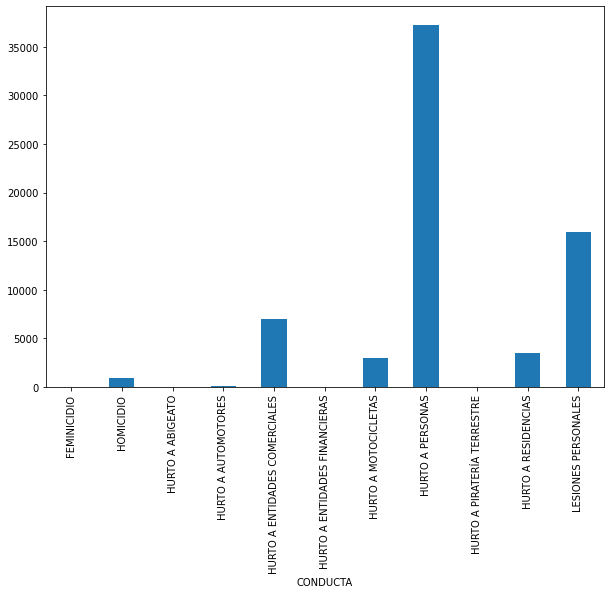

In [43]:
tabla_conducta.plot(kind='bar', figsize=(10,7))

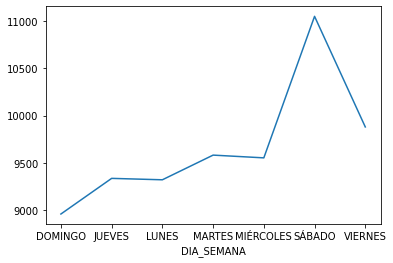

In [44]:
df_new.groupby(['DIA_SEMANA'])['ones'].count().plot()

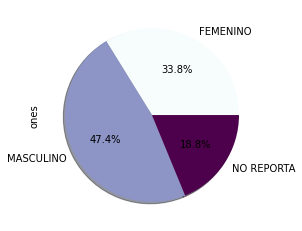

In [45]:
df_new.groupby(['GENERO'])['ones'].count().plot.pie(autopct="%.1f%%", cmap='BuPu', shadow=True)

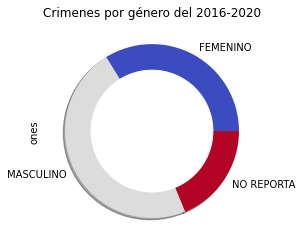

In [46]:
circle = plt.Circle((0,0), 0.7, color='white')
fig = plt.figure()



df_new.groupby(['GENERO'])['ones'].count().plot.pie(cmap='coolwarm', shadow=True).set_title('Crimenes por género del 2016-2020')
p = plt.gcf()

p.gca().add_artist(circle)
plt.show()

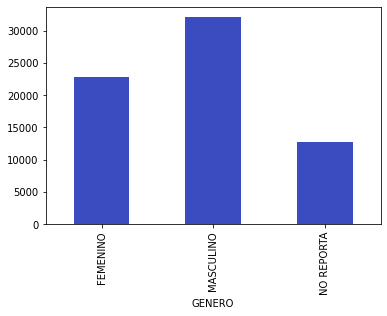

In [47]:
df_new.groupby(['GENERO'])['ones'].count().plot.bar(cmap='coolwarm')

### 2018

In [48]:
df_crime[df_crime['ANO']==2018].groupby(['NOM_COMUNA','ANO']).count()

,,CONDUCTA,LATITUD,LONGITUD,BARRIOS_HECHO,MES,DIA,DIA_SEMANA,GENERO,EDAD,MOVIL_VICTIMA,MOVIL_AGRESOR,CONDUCTA_SIMP,ones
NOM_COMUNA,ANO,,,,,,,,,,,,,
CABECERA DEL LLANO,2018,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100
CENTRO,2018,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159
EGIMIENTO 1,2018,36,36,36,36,36,36,36,36,36,36,36,36,36
EGIMIENTO 2,2018,3,3,3,3,3,3,3,3,3,3,3,3,3
EGIMIENTO 3,2018,24,24,24,24,24,24,24,24,24,24,24,24,24
GARCÍA ROVIRA,2018,591,591,591,591,591,591,591,591,591,591,591,591,591
LA CIUDADELA,2018,235,235,235,235,235,235,235,235,235,235,235,235,235
LA CONCORDIA,2018,866,866,866,866,866,866,866,866,866,866,866,866,866
LA PEDREGOSA,2018,173,173,173,173,173,173,173,173,173,173,173,173,173


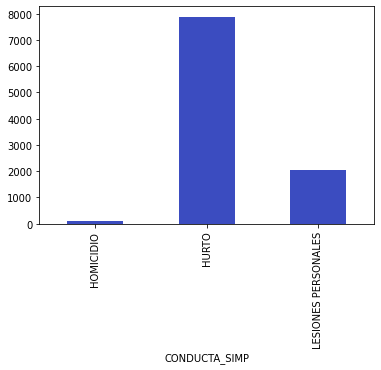

In [63]:
df_crime[df_crime['ANO']==2018].groupby(['CONDUCTA_SIMP'])['ones'].count().plot.bar(cmap='coolwarm')

In [50]:
px.scatter_mapbox(df_crime[df_crime['ANO']==2018],lat='LATITUD', lon='LONGITUD', color='NOM_COMUNA', color_continuous_scale=px.colors.cyclical.IceFire, zoom=12)

### 2019

In [52]:
df_2019 = df_new[df_new['ANO'] == 2019]

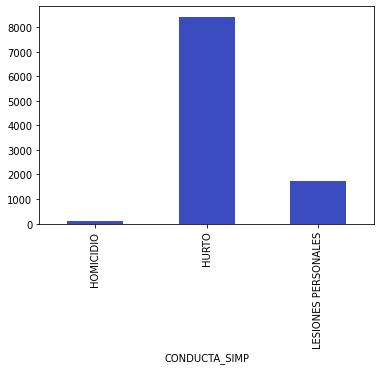

In [62]:
df_2019.groupby(['CONDUCTA_SIMP'])['ones'].count().plot.bar(cmap='coolwarm')

In [53]:
px.scatter_mapbox(df_2019,lat='LATITUD', lon='LONGITUD', color='NOM_COMUNA', color_continuous_scale=px.colors.cyclical.IceFire, zoom=12)

In [ ]:
df_2019['LAT_ROUD'] = df_2019['LATITUD'].apply(lambda x: round(x,4))
df_2019['LON_ROUD'] = df_2019['LONGITUD'].apply(lambda x: round(x,4))

In [55]:
px.scatter_mapbox(df_2019,lat='LATITUD', lon='LONGITUD', color='CONDUCTA', color_continuous_scale=px.colors.cyclical.IceFire, zoom=12)

Text(0.5, 1.0, 'HURTOS EN EL AÑO 2019 POR COMUNA')

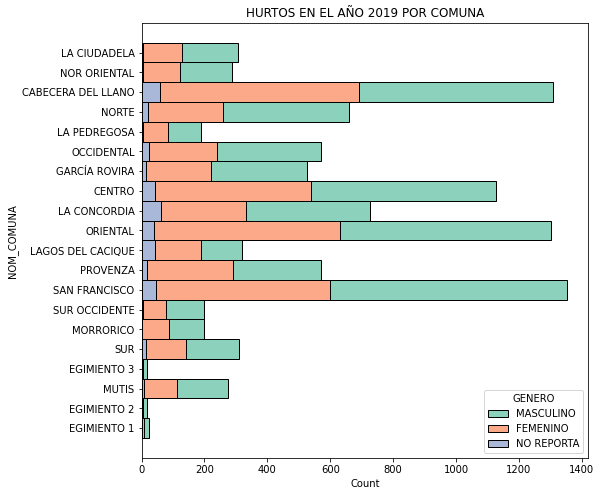

In [56]:
plt.figure(figsize=(8,8))
sns.histplot(data=df_2019, y='NOM_COMUNA', hue='GENERO', multiple='stack', palette='Set2').set_title('HURTOS EN EL AÑO 2019 POR COMUNA')

Text(0.5, 1.0, 'HURTOS EN EL AÑO 2019 POR DÍA DE LA SEMANA')

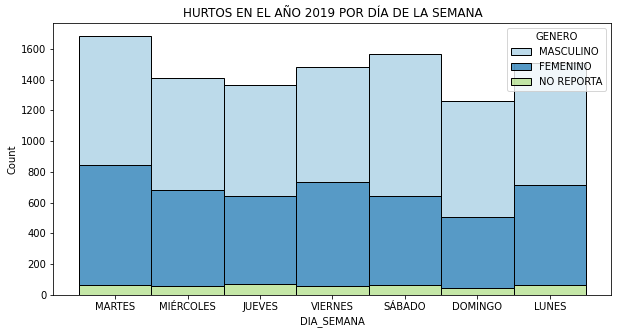

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_2019, x='DIA_SEMANA', hue='GENERO', multiple='stack', palette='Paired').set_title('HURTOS EN EL AÑO 2019 POR DÍA DE LA SEMANA')

Text(0.5, 1.0, 'HURTOS EN EL AÑO 2019 POR AÑO')

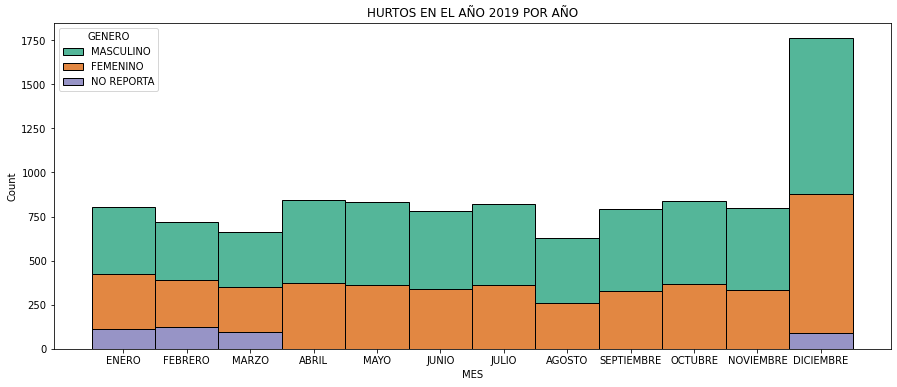

In [58]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_2019, x='MES', multiple='stack',hue='GENERO', palette='Dark2').set_title('HURTOS EN EL AÑO 2019 POR AÑO')

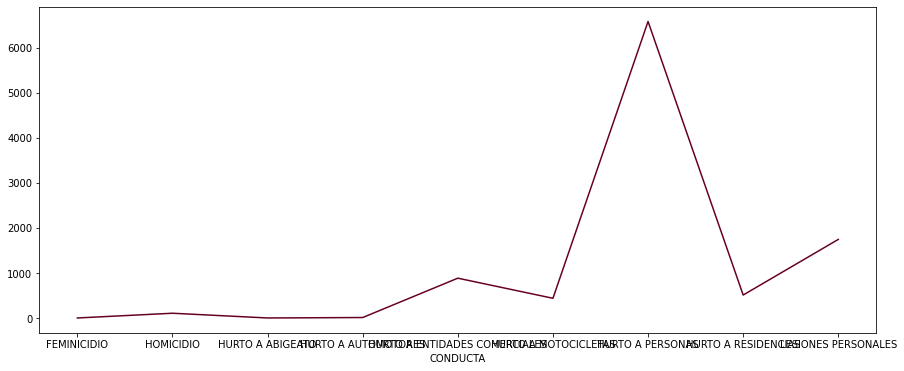

In [59]:
plt.figure(figsize=(15,6))
df_2019.groupby(['CONDUCTA'])['ones'].count().plot(cmap='RdBu')